In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Boston-Dataset.csv')

In [4]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


CRIM – Per capita crime rate by town
→ Tingkat kejahatan per kapita di setiap kota. Nilai ini menunjukkan tingkat keamanan lingkungan.

ZN – Proportion of residential land zoned for lots over 25,000 sq.ft.
→ Proporsi tanah residensial yang diatur untuk rumah-rumah dengan luas lebih dari 25.000 kaki persegi. Mewakili zonasi perumahan mewah.

INDUS – Proportion of non-retail business acres per town
→ Persentase lahan yang digunakan untuk aktivitas bisnis non-ritel di kota tersebut. Semakin tinggi nilainya, semakin banyak industri di daerah tersebut.

CHAS – Charles River dummy variable (1 if tract bounds river; 0 otherwise)
→ Variabel biner (dummy) yang menunjukkan apakah wilayah tersebut berbatasan dengan Sungai Charles (1 = ya, 0 = tidak).

NOX – Nitric oxides concentration (parts per 10 million)
→ Konsentrasi polusi udara dari gas nitrogen oksida. Menunjukkan tingkat pencemaran udara.

RM – Average number of rooms per dwelling
→ Rata-rata jumlah kamar per rumah. Biasanya semakin banyak kamar, semakin besar dan mahal rumah tersebut.

AGE – Proportion of owner-occupied units built prior to 1940
→ Persentase rumah yang dibangun sebelum tahun 1940 dan dimiliki oleh pemiliknya sendiri. Menunjukkan usia bangunan.

DIS – Weighted distances to five Boston employment centres
→ Jarak rata-rata (berbobot) ke lima pusat pekerjaan utama di Boston. Menggambarkan akses ke pusat pekerjaan.

RAD – Index of accessibility to radial highways
→ Indeks kemudahan akses ke jalan raya radial. Jalan radial adalah jalan utama yang menghubungkan ke pusat kota.

TAX – Full-value property-tax rate per $10,000
→ Tarif pajak properti penuh per $10.000 dari nilai properti. Mewakili beban pajak di area tersebut.

PTRATIO – Pupil-teacher ratio by town
→ Rasio murid terhadap guru di setiap kota. Indikator kualitas pendidikan (semakin kecil, biasanya semakin baik).

B – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
→ Variabel yang merepresentasikan komposisi rasial dengan rumus yang rumit. Ini digunakan secara historis tapi dianggap problematik dan bias secara etika.

LSTAT – % lower status of the population
→ Persentase populasi berstatus sosial ekonomi rendah. Faktor ini sangat berkorelasi negatif dengan harga rumah.

MEDV – Median value of owner-occupied homes in $1000's
→ Nilai tengah harga rumah yang dimiliki oleh pemiliknya (dalam ribuan dolar). Ini adalah target variabel yang sering diprediksi dalam model prediktif.

In [6]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [7]:
data = data.drop(columns=["Unnamed: 0"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


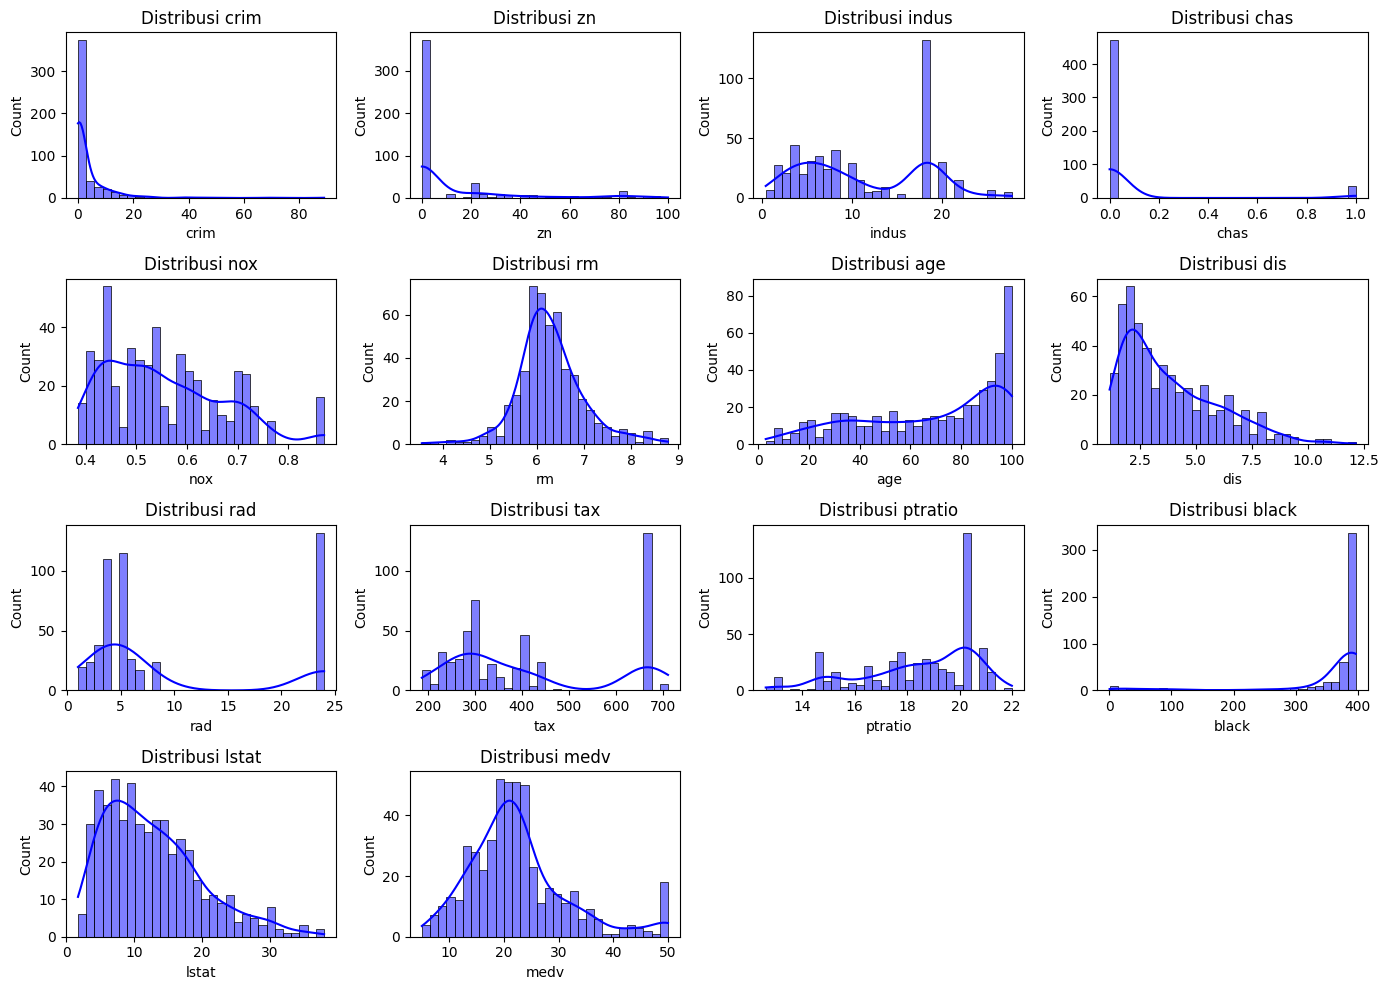

In [10]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], bins=30 , kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

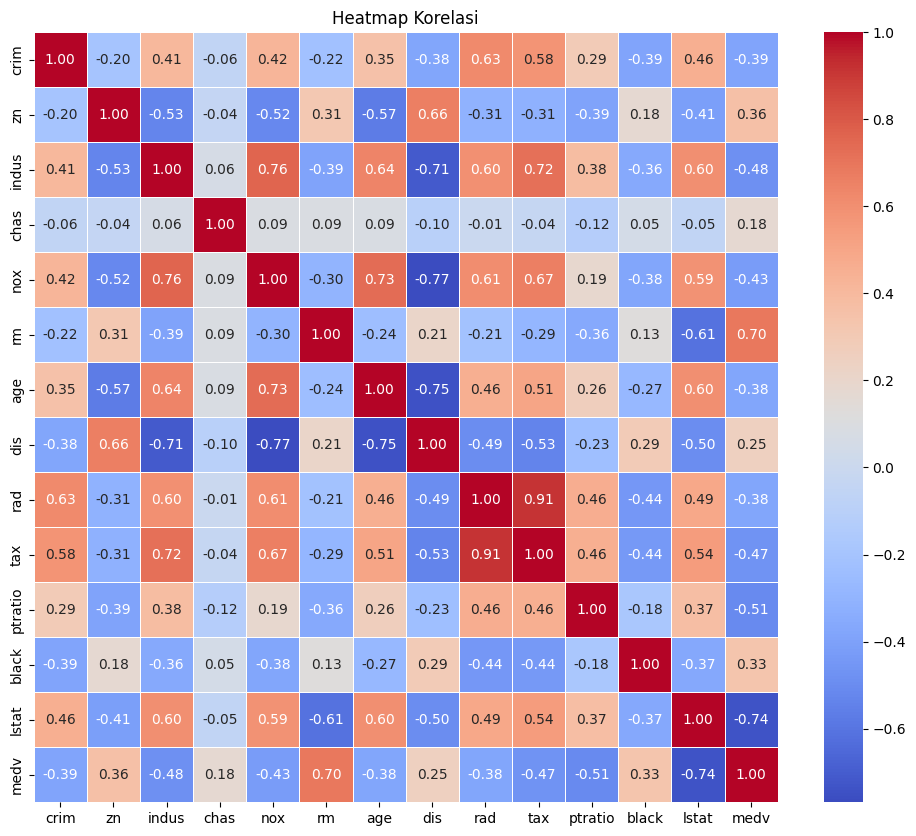

In [11]:
plt.figure(figsize=(12,10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

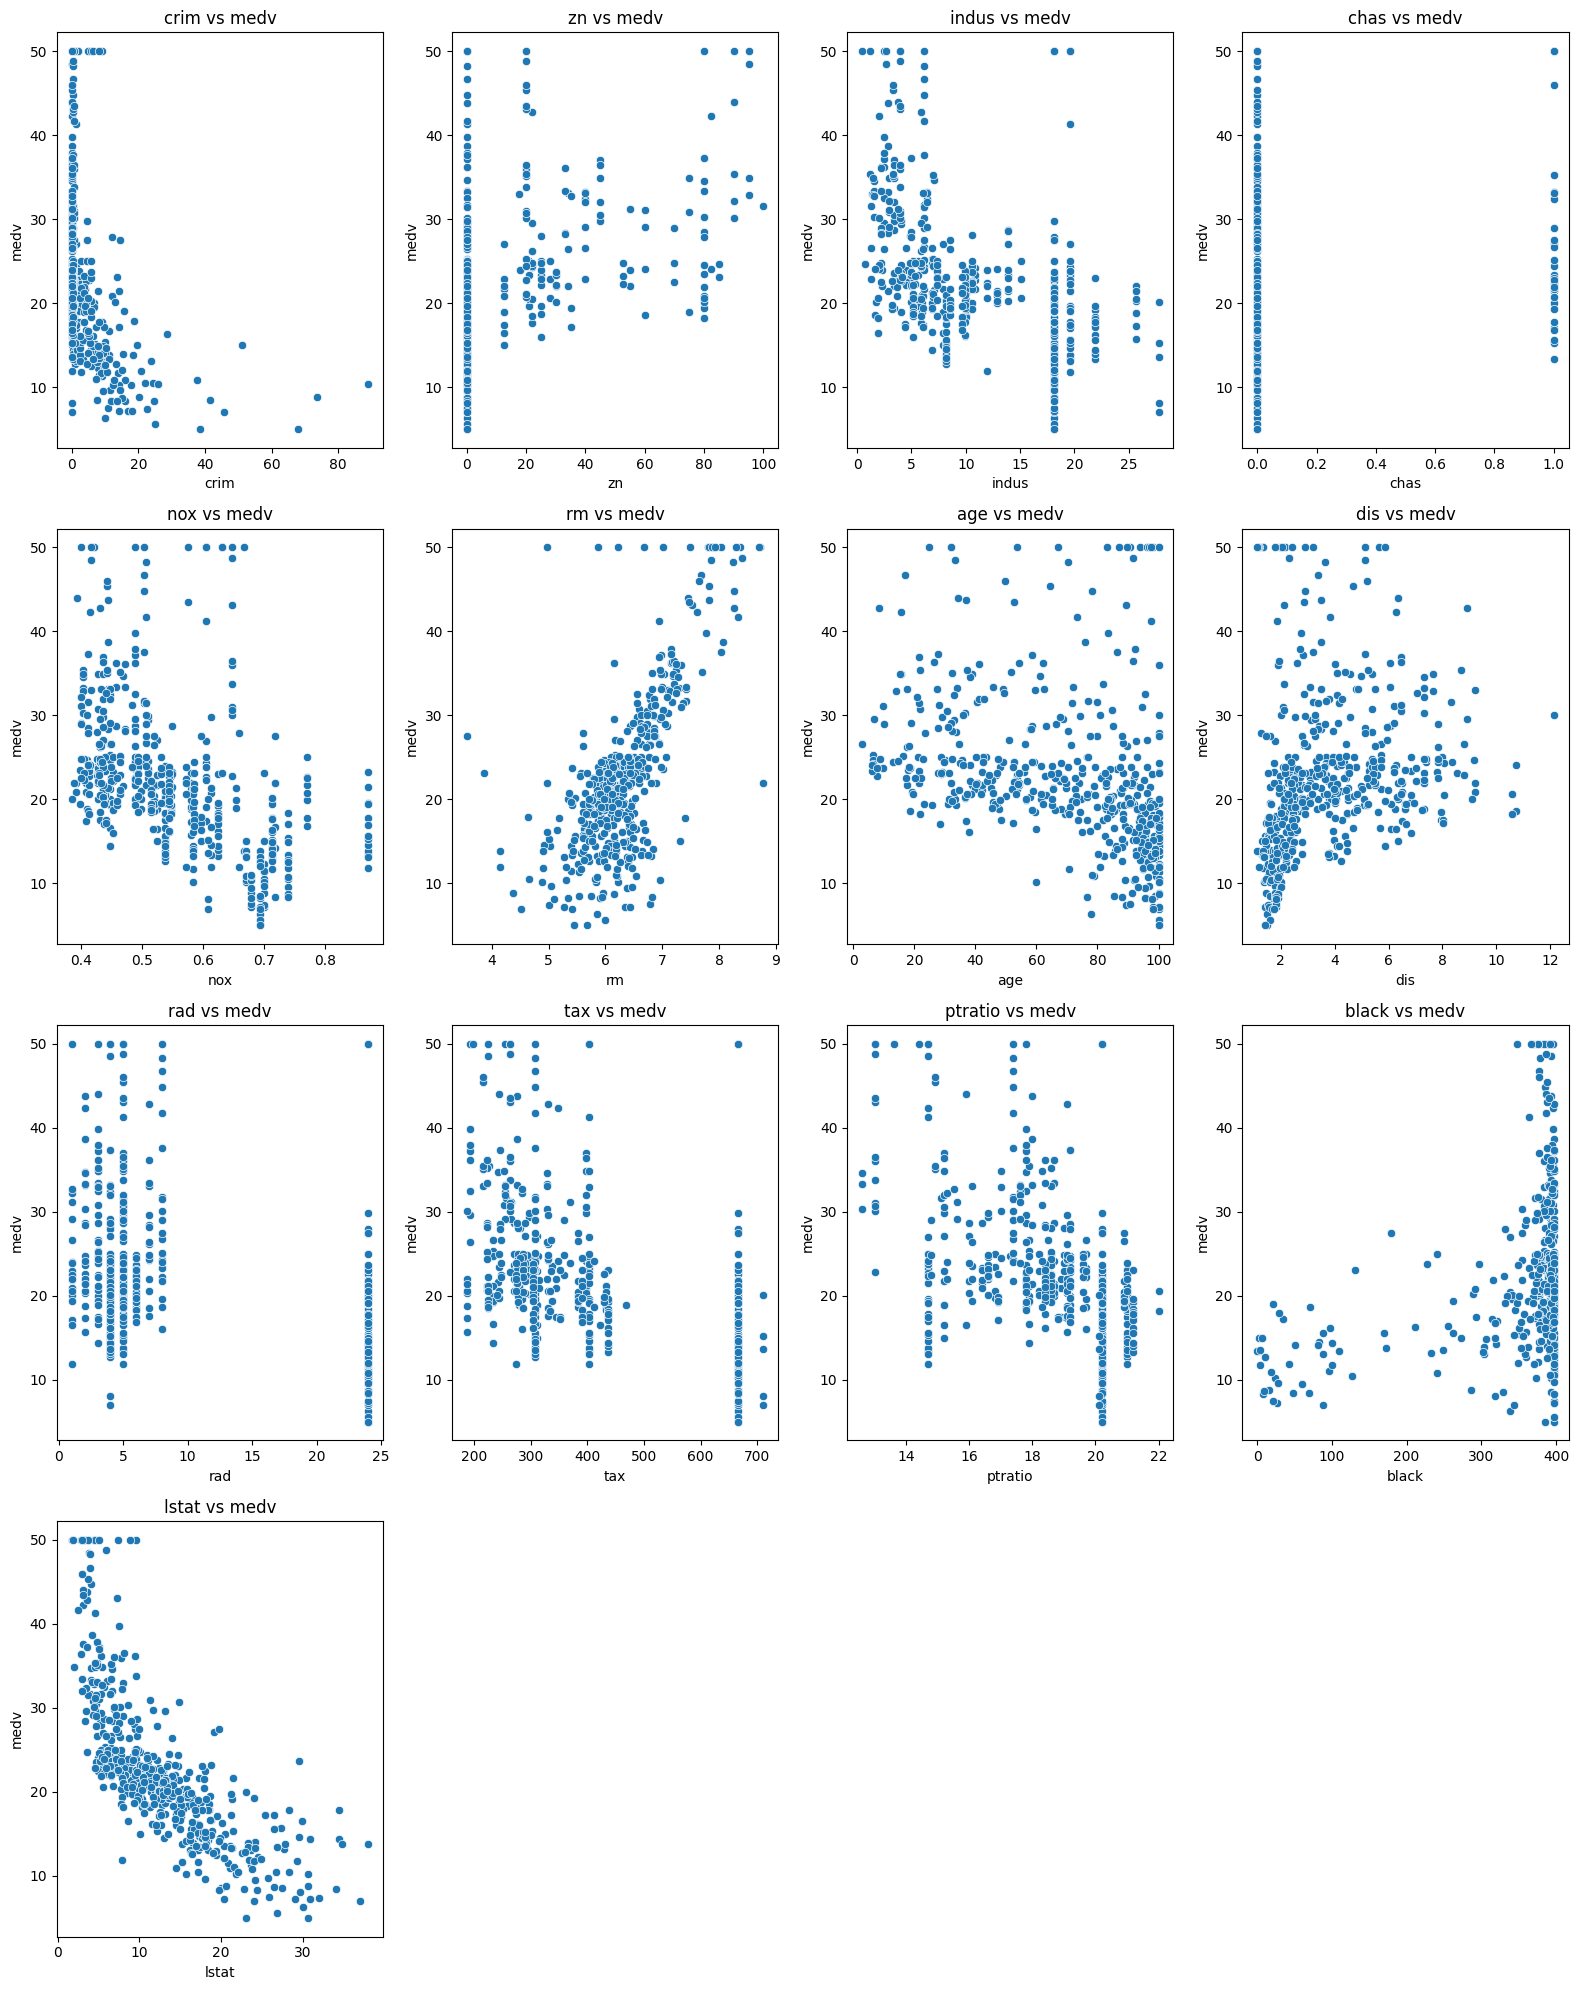

In [12]:
# Ambil hanya fitur numerik
num_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['medv'])

# Plot
plt.figure(figsize=(16, 20))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=data[column], y=data['medv'])
    plt.xlabel(column)
    plt.ylabel('medv')
    plt.title(f'{column} vs medv')

plt.tight_layout()
plt.show()

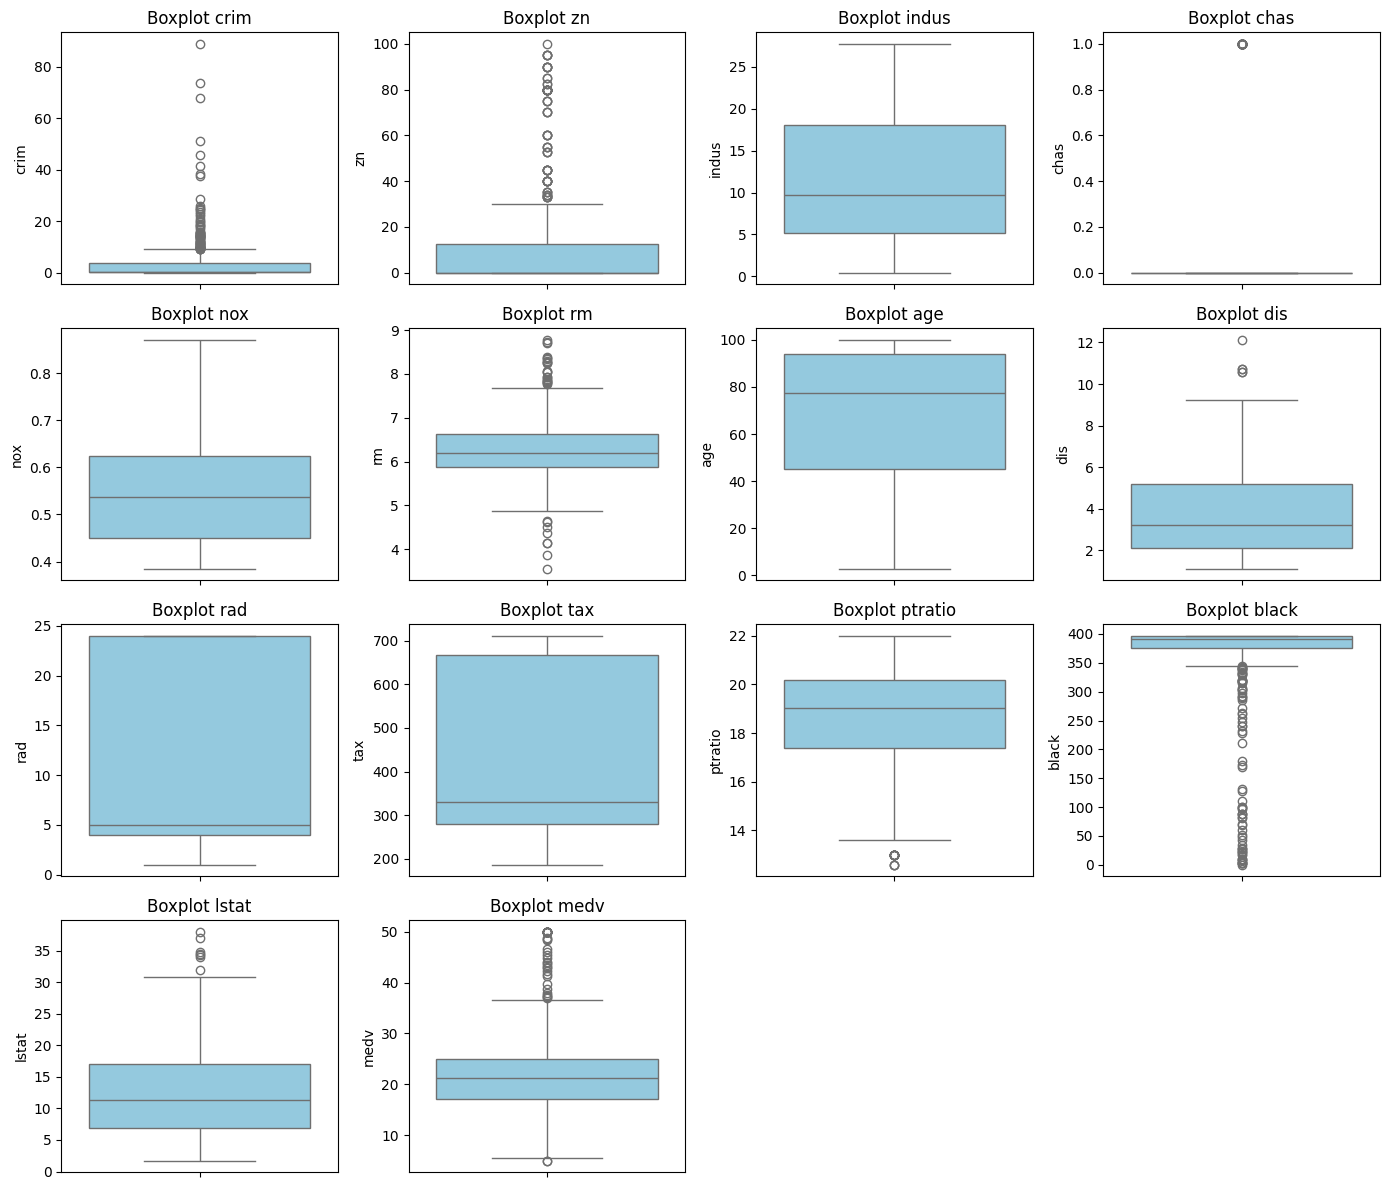

In [13]:
num_features = data.select_dtypes(include=['float64', 'int64'])

# Plot boxplot tiap fitur
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_features.columns, 1):
    plt.subplot(4, 4, i)  # Ubah angka sesuai jumlah kolom
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

In [14]:
# Daftar kolom yang ingin difilter outlier-nya
columns_to_check = ['crim', 'zn', 'lstat']

# Salin dataframe agar tidak merusak yang asli
df_clean = data.copy()

# Loop per kolom dan filter berdasarkan IQR
for col in columns_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter hanya untuk kolom tersebut
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     385 non-null    float64
 1   zn       385 non-null    float64
 2   indus    385 non-null    float64
 3   chas     385 non-null    int64  
 4   nox      385 non-null    float64
 5   rm       385 non-null    float64
 6   age      385 non-null    float64
 7   dis      385 non-null    float64
 8   rad      385 non-null    int64  
 9   tax      385 non-null    int64  
 10  ptratio  385 non-null    float64
 11  black    385 non-null    float64
 12  lstat    385 non-null    float64
 13  medv     385 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 45.1 KB


In [16]:
import numpy as np
df_clean['crim'] = np.log1p(df_clean['crim'])
df_clean['zn'] = np.log1p(df_clean['zn'])
df_clean['indus'] = np.log1p(df_clean['zn'])
df_clean['nox'] = np.log1p(df_clean['nox'])
df_clean['dis'] = np.log1p(df_clean['dis'])
df_clean['rad'] = np.log1p(df_clean['rad'])
df_clean['tax'] = np.log1p(df_clean['tax'])
df_clean['ptratio'] = np.log1p(df_clean['ptratio'])
df_clean['lstat'] = np.log1p(df_clean['lstat'])
df_clean['medv'] = np.log1p(df_clean['medv'])
df_clean['black'] = np.log1p(df_clean['black'])

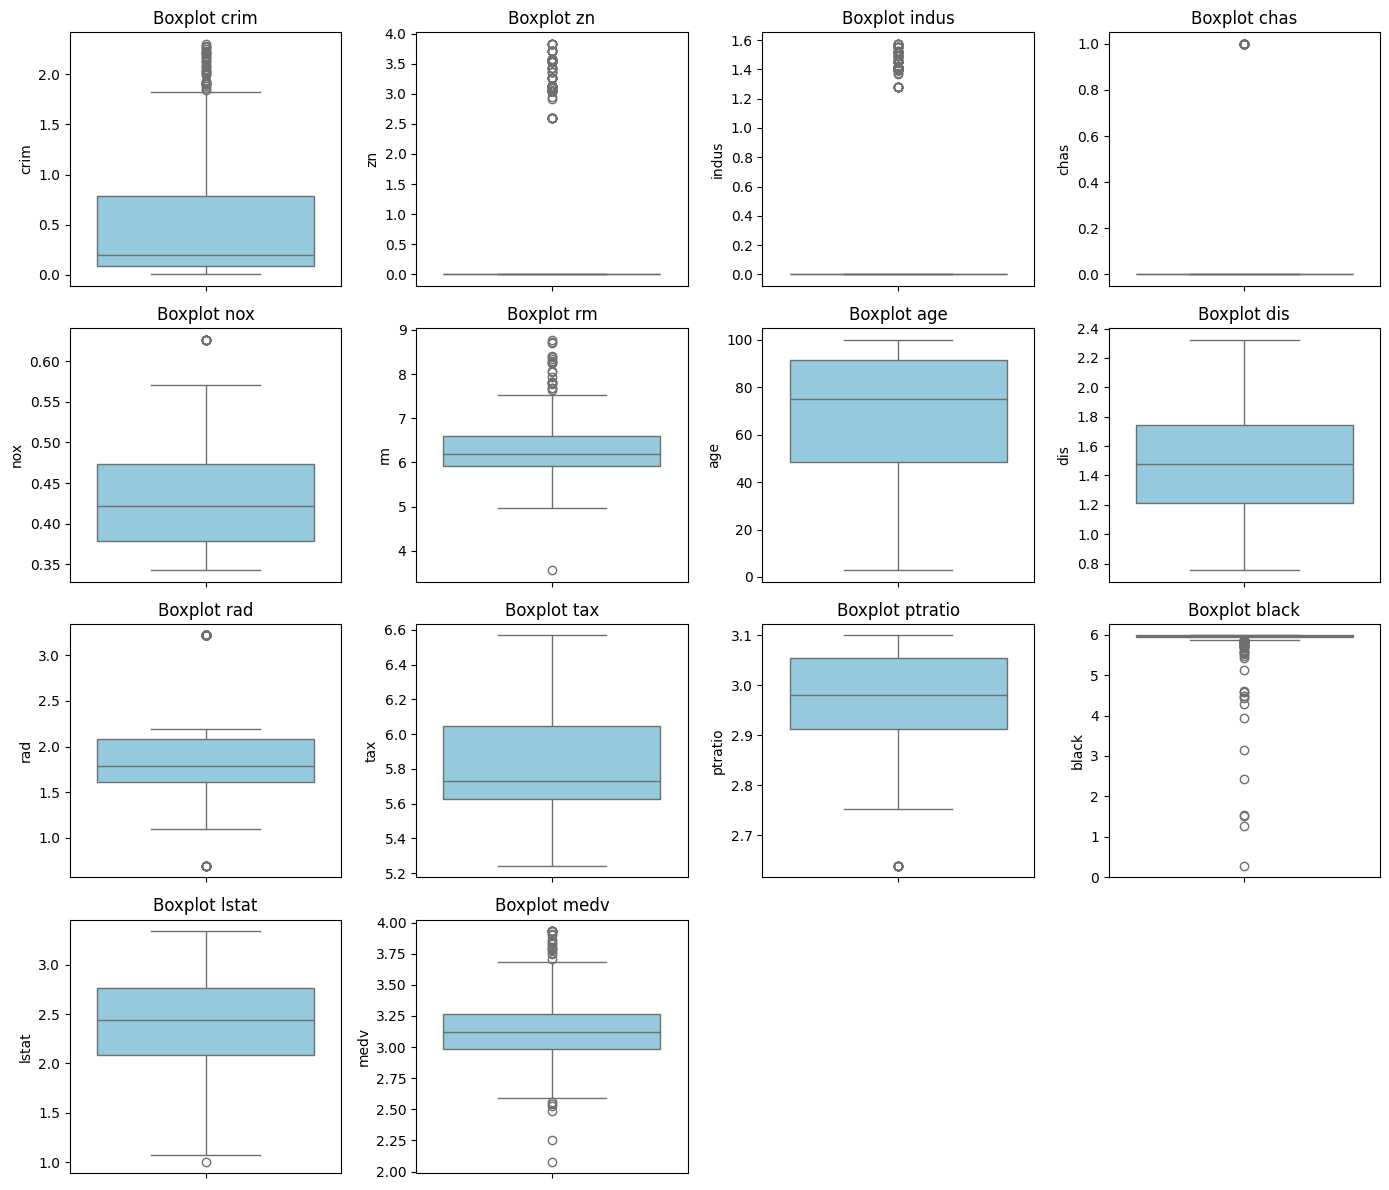

In [17]:
num_features = df_clean.select_dtypes(include=['float64', 'int64'])

# Plot boxplot tiap fitur
plt.figure(figsize=(14, 12))
for i, col in enumerate(num_features.columns, 1):
    plt.subplot(4, 4, i)  # Ubah angka sesuai jumlah kolom
    sns.boxplot(y=df_clean[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

## Modelling - 1

In [18]:
X = data.drop(columns=['medv'])
y = data['medv']

In [19]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:

y_pred_lr = lr.predict(X_test)


In [25]:
print("Intercept (b0):", lr.intercept_)
for fitur, coef in zip(X.columns,lr.coef_):
    print(f"Koefisien {fitur} (b): {coef}")

Intercept (b0): 30.24675099392349
Koefisien crim (b): -0.11305592398537863
Koefisien zn (b): 0.030110464145648223
Koefisien indus (b): 0.04038072041333297
Koefisien chas (b): 2.7844382035079644
Koefisien nox (b): -17.202633391781003
Koefisien rm (b): 4.438835199513043
Koefisien age (b): -0.0062963622109808905
Koefisien dis (b): -1.447865368530779
Koefisien rad (b): 0.26242973558508303
Koefisien tax (b): -0.010646786275308219
Koefisien ptratio (b): -0.9154562404680713
Koefisien black (b): 0.012351334729969164
Koefisien lstat (b): -0.5085714244487934


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [27]:
y_pred_gbr = gbr.predict(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred_rf = rf.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MSE": mse, "MAE": mae, "R2": r2}

# Evaluasi masing-masing model
results = []
results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

In [31]:
results_df = pd.DataFrame(results)
print(results_df)

                         Model        MSE       MAE        R2
0            Linear Regression  24.291119  3.189092  0.668759
1  Gradient Boosting Regressor   6.208861  1.912243  0.915334
2                Random Forest   7.901514  2.039539  0.892253


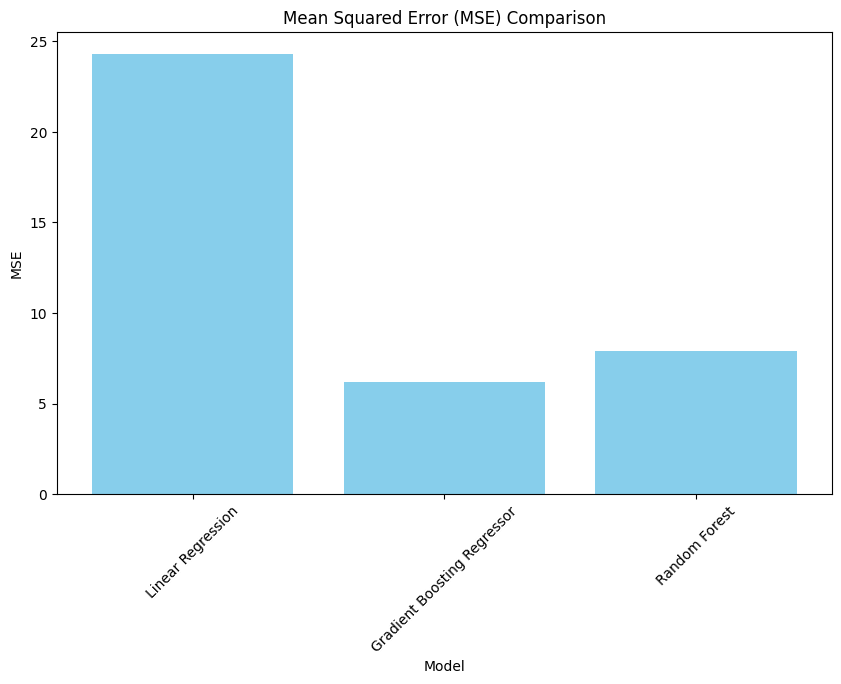

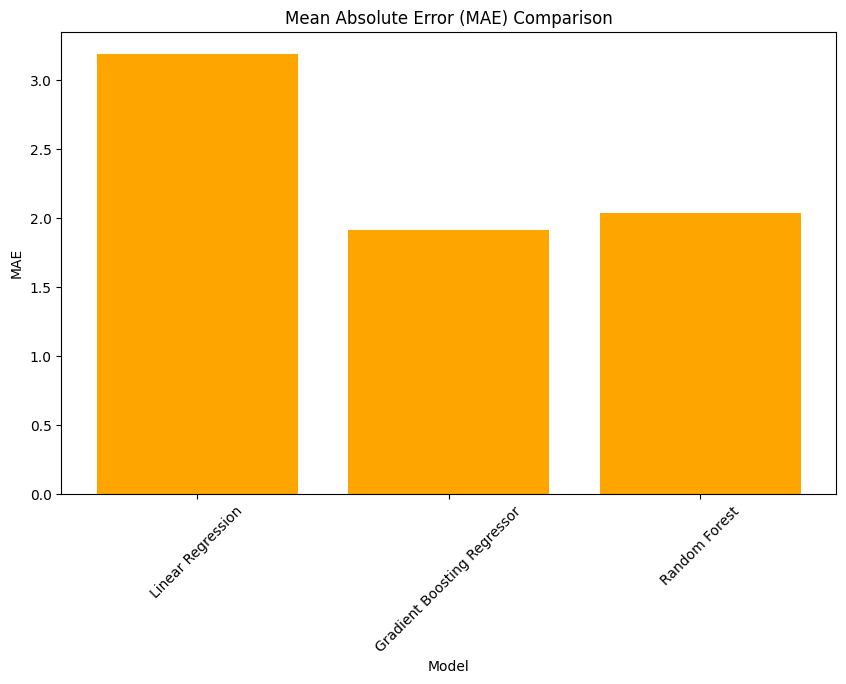

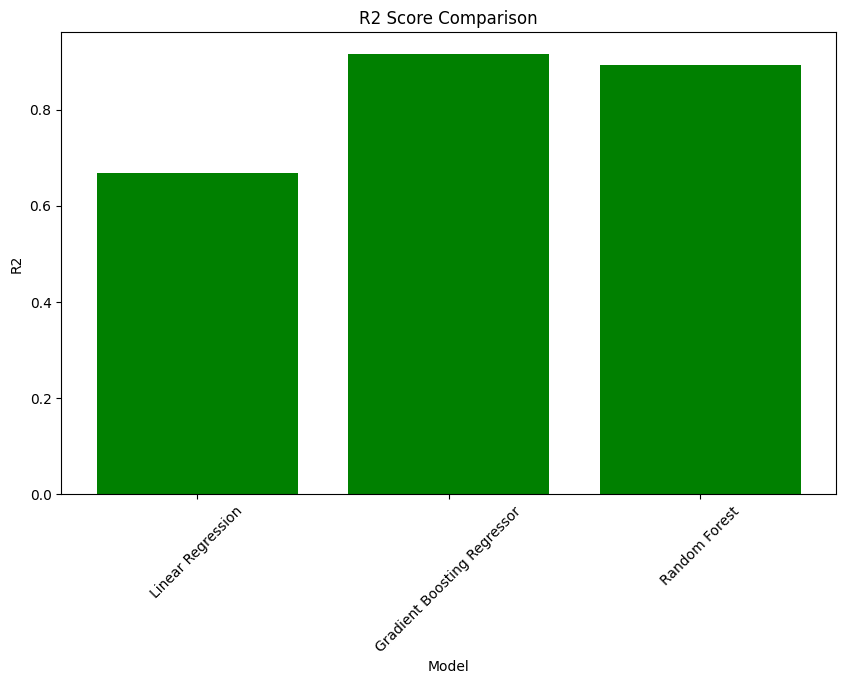

In [32]:
# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["MSE"], color='skyblue')
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["MAE"], color='orange')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot R2 Score
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R2"], color='green')
plt.title("R2 Score Comparison")
plt.ylabel("R2")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

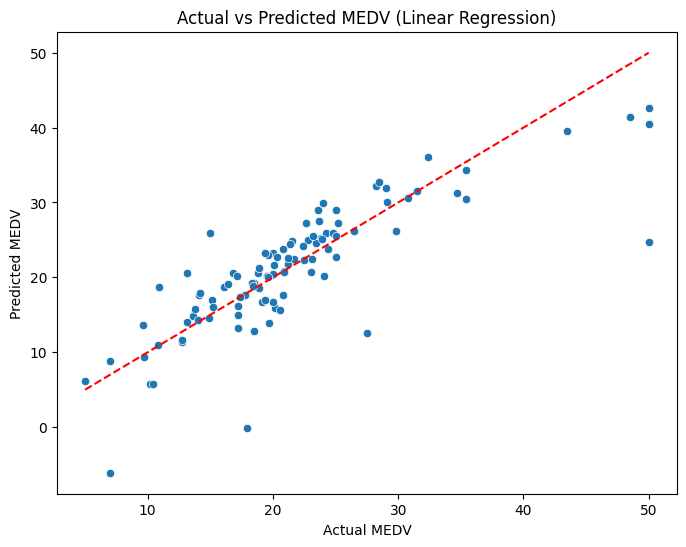

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # line y=x
plt.show()


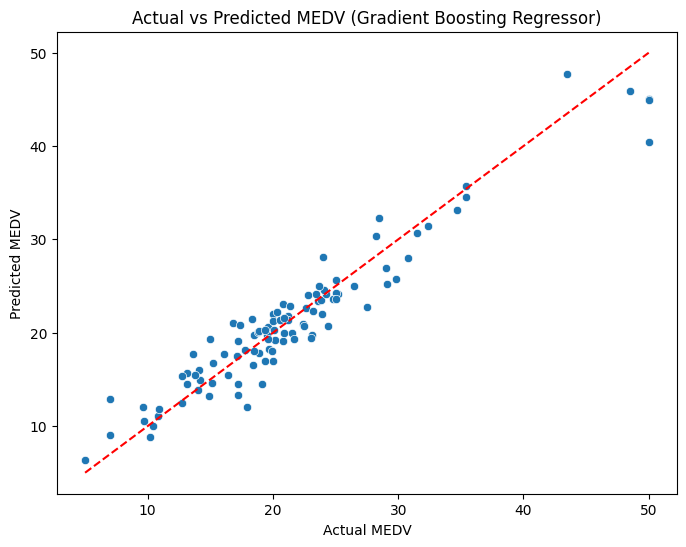

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Gradient Boosting Regressor)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # line y=x
plt.show()

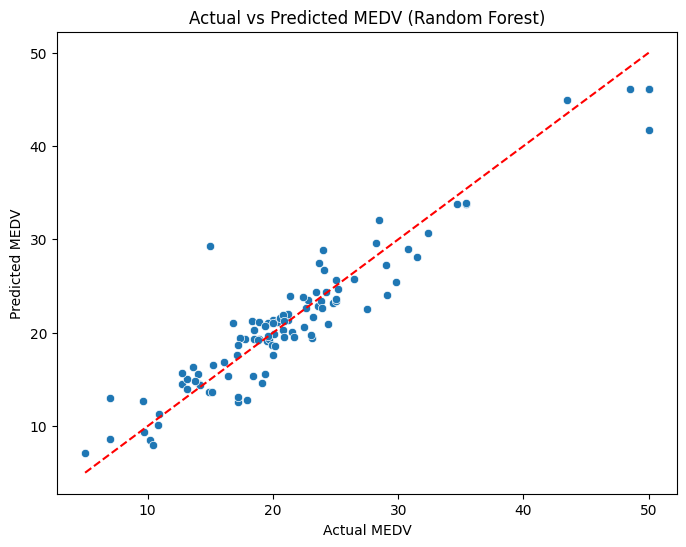

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # line y=x
plt.show()

In [37]:
single_row_price = {
    "crim": 3.6,
    "zn": 11.2,
    "indus": 11,
    "chas": 0.07,
    "nox": 0.5,
    "rm": 6.4,
    "age": 68,
    "dis": 3.8,
    "rad": 9.5,
    "tax": 408,
    "ptratio":18,
    'black':356,
    'lstat':12.7
}

single_row_df = pd.DataFrame([single_row_price])

In [38]:
predicted_price = gbr.predict(single_row_df)

In [40]:
predicted_price[0]

np.float64(22.600286736053953)

In [43]:
def predict_price(model):
    single_row_price = {
        "crim": 3.6,
        "zn": 11.2,
        "indus": 11,
        "chas": 0,
        "nox": 0.5,
        "rm": 6.4,
        "age": 68,
        "dis": 3.8,
        "rad": 9.5,
        "tax": 408,
        "ptratio":18,
        'black':356,
        'lstat':12.7
    }

    single_row_df = pd.DataFrame([single_row_price])

    predicted_price = model.predict(single_row_df)

    return predicted_price[0]

predicted_price_lr = predict_price(lr)
print(f"Predicted Median Home Value: ${predicted_price_lr:.2f}")
predicted_price_gbr = predict_price(gbr)
print(f"Predicted Median Home Value: ${predicted_price_gbr:.2f}")
predicted_price_rf = predict_price(rf)
print(f"Predicted Median Home Value: ${predicted_price_rf:.2f}")


Predicted Median Home Value: $24.11
Predicted Median Home Value: $22.60
Predicted Median Home Value: $22.48


In [44]:
def predict_price(model):
    single_row_price = {
        "crim": 0.006,
        "zn": 17,
        "indus": 2.31,
        "chas": 0,
        "nox": 0.537,
        "rm": 6.4,
        "age": 65,
        "dis": 4.09,
        "rad": 1,
        "tax": 296,
        "ptratio":15.4,
        'black':397,
        'lstat':5
    }

    single_row_df = pd.DataFrame([single_row_price])

    predicted_price = model.predict(single_row_df)

    return predicted_price[0]

predicted_price_lr = predict_price(lr)
print(f"Predicted Median Home Value: ${predicted_price_lr:.2f}")
predicted_price_gbr = predict_price(gbr)
print(f"Predicted Median Home Value: ${predicted_price_gbr:.2f}")
predicted_price_rf = predict_price(rf)
print(f"Predicted Median Home Value: ${predicted_price_rf:.2f}")

Predicted Median Home Value: $29.06
Predicted Median Home Value: $26.42
Predicted Median Home Value: $24.77
